In [1]:
'''
This is Homework 3 for AMATH 581
Tianbo Zhang 1938501
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.special import hermite as hermite

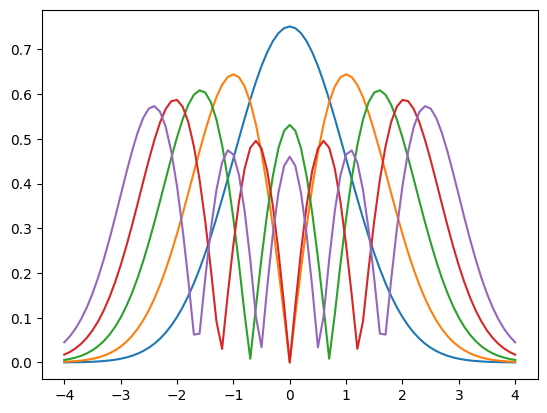

In [2]:
# PART (a)
# Constants
L = 4
xspan = np.arange(-L, L+0.1, 0.1)
K = 1
epsilon_start = 0
tol = 1e-4
A = 1
A1 = []
A2 = []

def shoot(phi, x, K, epsilon):
    return [phi[1], (K * x**2 - epsilon) * phi[0]]

def normalize(phi):
    norm = np.sqrt(np.trapz(phi[:, 0] * phi[:, 0], xspan))
    return abs(phi[:, 0]/norm)

for modes in range(1, 6):
    epsilon = epsilon_start
    depsilon = 0.1
    for i in range(1000):
        phi0 = [A, A*np.sqrt(A*L*L - epsilon)]
        phi = odeint(shoot, phi0, xspan, args = (K, epsilon))
        temp = phi[-1, 1] + np.sqrt(K*L*L - epsilon)*phi[-1, 0]
        if np.abs(temp) < tol:
            eigfunc = normalize(phi)
            A1.append(eigfunc)
            A2.append(epsilon)
            break
        if (-1) ** (modes + 1) * temp > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    epsilon_start = epsilon + 0.1
    plt.plot(xspan, eigfunc)
A1 = np.transpose(np.array(A1))
A2 = np.array(A2)

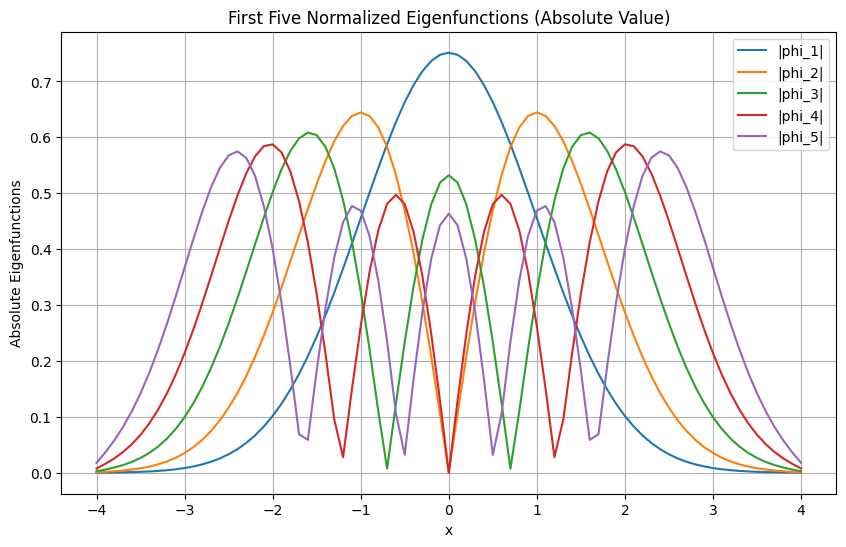

Eigenvalues (A4): [0.99937508 2.99688594 4.99206871 6.98617046 8.9853595 ]
Eigenfunctions (A3) saved in a 5-column matrix format.


In [3]:
# PART (b)
# Constants
L = 4.0         # Boundary for x [-L, L]
dx = 0.1        # Step size
K = 1.0         # Given K value

# Discretized x values
x = np.arange(-L, L+0.1, 0.1)
N = len(x)

# Constructing the main diagonal and the off-diagonal for the Hamiltonian matrix
main_diag = np.array([2 / dx**2 + K * xi**2 for xi in x])
off_diag = np.array([-1 / dx**2] * (N - 1))

# Solve the tridiagonal eigenvalue problem
eigenvalues, eigenfunctions = eigh_tridiagonal(main_diag, off_diag)

# Normalize eigenfunctions
for i in range(5):
    norm = np.sqrt(np.trapz(eigenfunctions[:, i] ** 2, x))
    eigenfunctions[:, i] = np.abs(eigenfunctions[:, i] / norm)

# Save the results
A3 = eigenfunctions[:, 0:5]  # Eigenfunctions as absolute values
A4 = eigenvalues[0:5]  # Eigenvalues

# Display eigenfunctions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x, A3[:, i], label=f'|phi_{i+1}|')
plt.xlabel('x')
plt.ylabel('Absolute Eigenfunctions')
plt.title('First Five Normalized Eigenfunctions (Absolute Value)')
plt.legend()
plt.grid()
plt.show()

print("Eigenvalues (A4):", A4)
print("Eigenfunctions (A3) saved in a 5-column matrix format.")


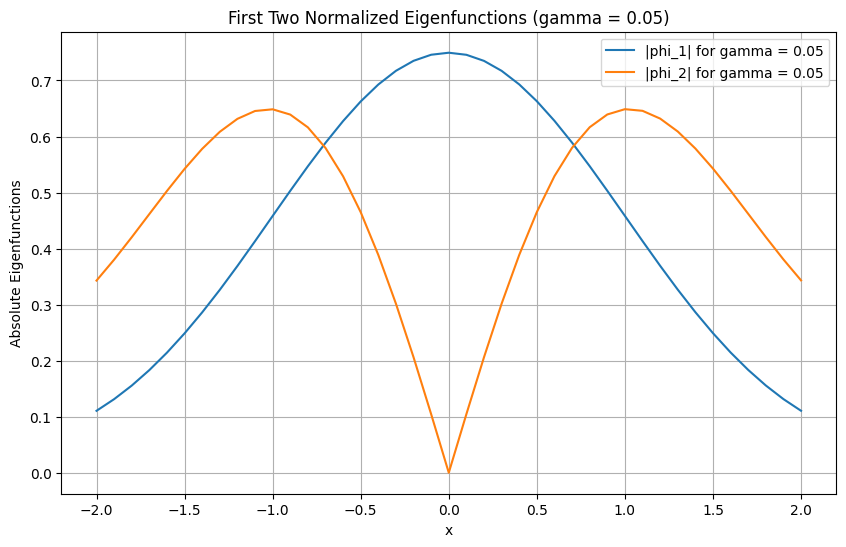

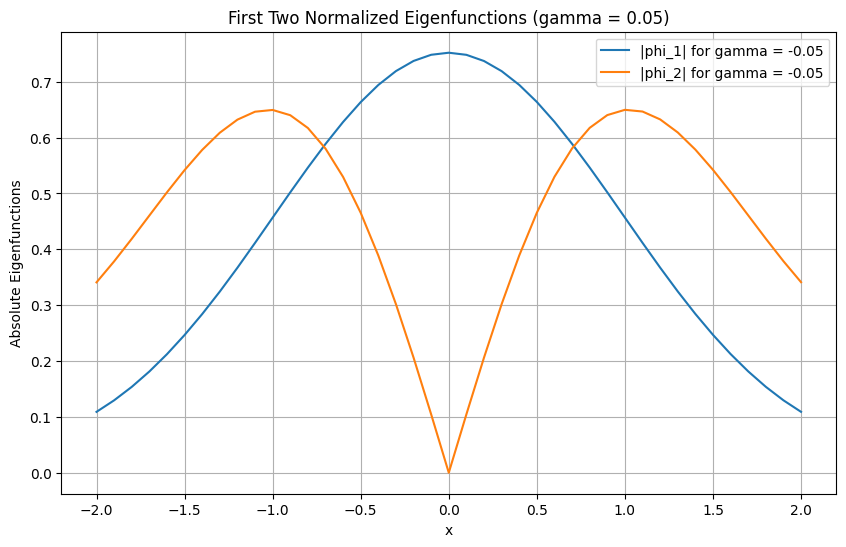

In [4]:
# PART (c)
L = 2
dx = 0.1
x = np.arange(-L, L+0.1, 0.1)
K = 1
gamma_values = [0.05, -0.05]
tol = 1e-4
epsilon_start = 0
def shooting(x, phi, epsilon, gamma):
    return [phi[1], (gamma * np.abs(phi[0])**2 + K * x**2 - epsilon) * phi[0]]

def solve_eig(epsilon, gamma, A):
    phi0 = [A, A*np.sqrt(K * L**2 - epsilon)]
    phi = solve_ivp(shooting, [x[0], x[-1]], phi0, args = (epsilon, gamma), t_eval = x).y
    return phi

def normalize(phi):
    norm = np.sqrt(np.trapz(phi[:, 0]**2, x))
    return np.abs(phi[:, 0]/norm)

def find_sol(gamma):
    epsilon = epsilon_start
    eig_function = []
    eig_value = []
    for mode in range(2):
        A = 1e-4
        dA = 0.01
        for i in range(100):
            depsilon = 0.1
            for j in range(1000): # loop epsilon
                phi = np.transpose(solve_eig(epsilon, gamma, A))
                temp1 = phi[-1, 1] + np.sqrt(K * L**2 - epsilon) * phi[-1, 0]
                if np.abs(temp1) < tol:
                    break
                if (-1) ** (mode + 1) * temp1 < 0:
                    epsilon += depsilon
                else:
                    epsilon -= depsilon / 2
                    depsilon /= 2
            temp2 = np.trapz(phi[:, 0]**2, x)
            if np.abs(temp2 - 1) < tol:
                eig_value.append(epsilon)
                break
            if temp2 > 1:
                A -= dA
                dA /= 2
            elif temp2 < 1:
                A += dA
        epsilon += 0.5
        if i >= 99:
            print('xxxxx')
        eig_function.append(normalize(phi))
    return eig_function, eig_value
[A5, A6] = find_sol(gamma_values[0])
A5 = np.transpose(np.array(A5))
A6 = np.array(A6).reshape(1,2)

[A7, A8] = find_sol(gamma_values[1])
A7 = np.transpose(np.array(A7))
A8 = np.array(A8).reshape(1, 2)

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(x, A5[:, i], label=f'|phi_{i+1}| for gamma = 0.05')
plt.xlabel('x')
plt.ylabel('Absolute Eigenfunctions')
plt.title('First Two Normalized Eigenfunctions (gamma = 0.05)')
plt.legend()
plt.grid()
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(x, A7[:, i], label=f'|phi_{i+1}| for gamma = -0.05')
plt.xlabel('x')
plt.ylabel('Absolute Eigenfunctions')
plt.title('First Two Normalized Eigenfunctions (gamma = 0.05)')
plt.legend()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.44444444444444486, 0.285714285714286, 0.19047619047619063, 0.12121212121212133, 0.07843137254901968, 0.050000000000000044, 0.03174603174603177]


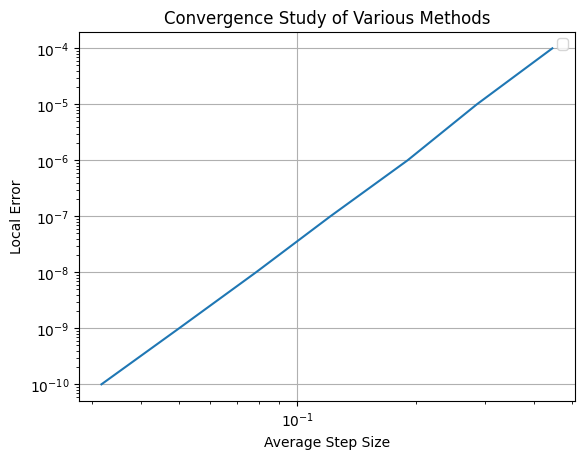

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.11111111111111122, 0.05333333333333338, 0.024844720496894433, 0.011560693641618507, 0.005361930294906171, 0.002492211838006233, 0.0011570726063060467]


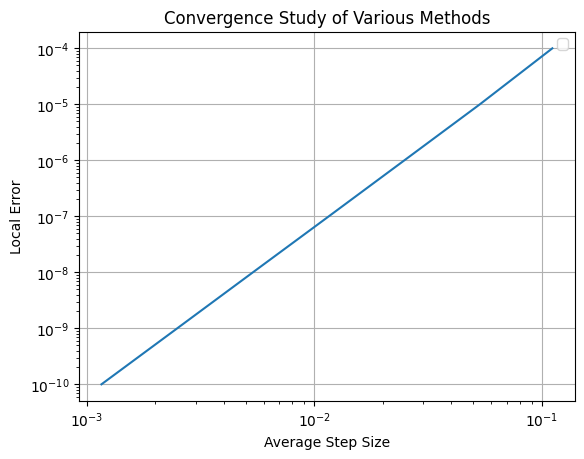

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.21052631578947387, 0.11764705882352952, 0.06557377049180334, 0.03773584905660381, 0.02150537634408604, 0.011834319526627229, 0.006896551724137937]


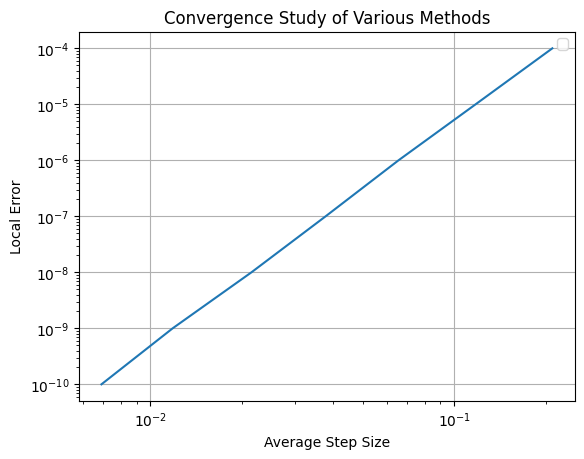

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.10526315789473693, 0.0701754385964913, 0.05063291139240512, 0.03508771929824565, 0.02453987730061352, 0.017316017316017337, 0.012232415902140683]


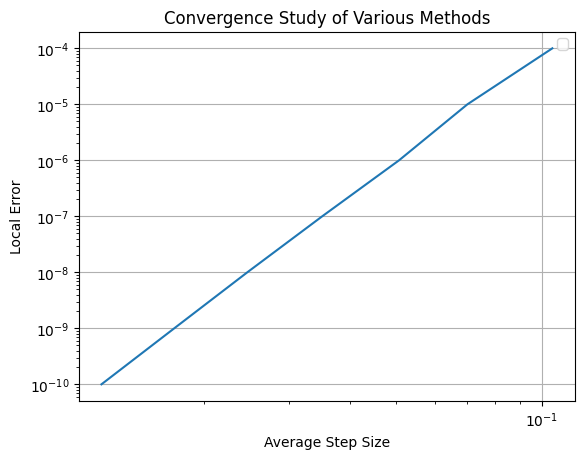

[5.24466756 3.01909953 4.03819927 6.45751261]


In [5]:
# PART D
L = 2
x_span = np.arange(-L, L + 0.1, 0.1)
theta = 1
A = 1
E = 1
theta0 = [A, A * np.sqrt(L**2 - 1)]
tol_values = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
methods = ['RK45', 'RK23', 'Radau', 'BDF']
slopes = []

def shoot(x, theta, epsilon):
    return [theta[1], (x**2 - epsilon) * theta[0]]

for method in methods:
    step_sizes = []
    errors = []

    for tol in tol_values:
        # Solve the ODE
        options = {'rtol': tol, 'atol': tol}
        theta = solve_ivp(shoot, [x_span[0], x_span[-1]], theta0, method=method,
                        args=(E,), **options)
        
        # Compute step sizes and errors
        step_sizes.append(np.mean(np.diff(theta.t)))
        true_solution = np.exp(-0.5 * K * theta.t**2)  # Assume analytical solution for comparison
        error = np.linalg.norm(theta.y[0] - true_solution, ord=2)
        errors.append(error)
        
    # Compute slopes
    log_step_sizes = np.log(step_sizes)
    log_tols = np.log(tol_values)
    slope = np.polyfit(log_step_sizes, log_tols, 1)
    slopes.append(slope[0])

    print(step_sizes)
    # Plot results
    plt.loglog(np.abs(step_sizes), tol_values)
    plt.xlabel('Average Step Size')
    plt.ylabel('Local Error')
    plt.title('Convergence Study of Various Methods')
    plt.legend()
    plt.grid()
    plt.show()

A9 = np.array(slopes)
print(A9)

In [7]:
# PART E
L = 4
x_span = np.arange(-L, L + 0.1, 0.1)

def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result
def normalize(phi, x):
    norm = np.trapz(phi**2, x)
    return np.abs(phi) / np.sqrt(norm)
    
# Find the exact eigenfunctions:
phi_exact = []
for i in range(5):
    H = hermite(i)(x_span)
    phi = 1 / np.sqrt(2** i * factorial(i) * np.sqrt(np.pi)) * H * np.exp(-x_span**2 / 2)
    phi_exact.append(normalize(phi, x_span))

# Find the exact eigenvalues:
eig_exact = []
for i in range(5):
    eig_exact.append(2 * i + 1)

A10 = []
A11 = []
A12 = []
A13 = []
# Calculate difference
for i in range(5):
    A10.append(np.trapz((np.abs(A1[:, i]) - np.abs(phi_exact[i]))**2, x_span))
    A11.append(100 * np.abs(A2[i] - eig_exact[i]) / eig_exact[i])
    A12.append(np.trapz((np.abs(A3[:, i]) - np.abs(phi_exact[i]))**2, x_span))
    A13.append(100 * np.abs(A4[i] - eig_exact[i]) / eig_exact[i])

In [8]:
A10 = np.array(A10)
A11 = np.array(A11)
A12 = np.array(A12)
A13 = np.array(A13)